In [17]:
from transformers import AutoModelForCausalLM,AutoTokenizer,pipeline

In [18]:
model_name="microsoft/Phi-3-mini-4k-instruct"
model=AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [19]:
tokenizer=AutoTokenizer.from_pretrained(model_name)

In [20]:
pipe=pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    return_full_text=False,
    do_sample=False,
    max_new_tokens=500
)

In [5]:
messages=[
    {"role":"user",
     "content":"tell me a joke about morocco."}
]
response=pipe(messages)[0]["generated_text"]
print(response)

The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.


 Why don't secrets stay secret in Morocco?

Because they always end up in the souk!


In [6]:
prompt=pipe.tokenizer.apply_chat_template(messages,tokenize=False)
print(prompt)

<|user|>
tell me a joke about morocco.<|end|>
<|endoftext|>


## Top p and Temperature

In [9]:
out=pipe(
    messages,
    do_sample=True,
    temperature=0.8
)[0]["generated_text"]
print(out)

 Why don't seagulls fly over Morocco?

Because they can't handle the sandstorms and the scents of all the delicious tagines!


In [16]:
out=pipe(messages,
     do_sample=True,
     top_p=0.9,
     temperature=0.9)[0]["generated_text"]
print(out)

 Sure, here's a light-hearted, travel-themed joke about Morocco:

Why don't they tell secrets on the plane to Marrakech?

Because in Morocco, everyone's already flying on the rumors!


# Prompt Engineering
* Whether the prompts are
questions, statements, or instructions, the main goal of prompt engineering is to elicit a useful response from the model.
*Prompt engineering is more than designing effective prompts. It can be used as a tool to evaluate the output of a model as well as to design safeguards and safety mitigation methods.

\begin{equation}
  prompt : \{\\
    instruction,\\
    data,\\
    outindicator
  \}
\end{equation}

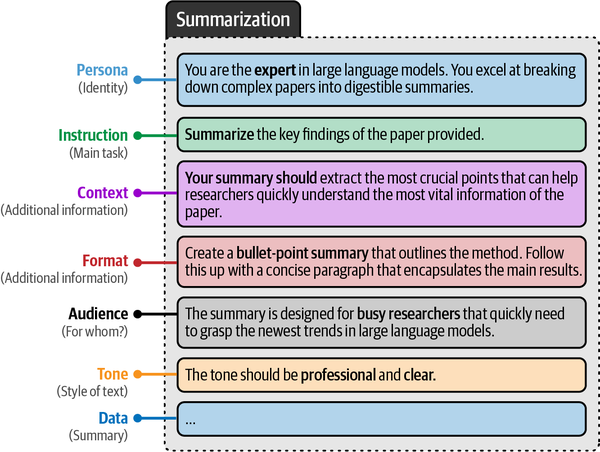

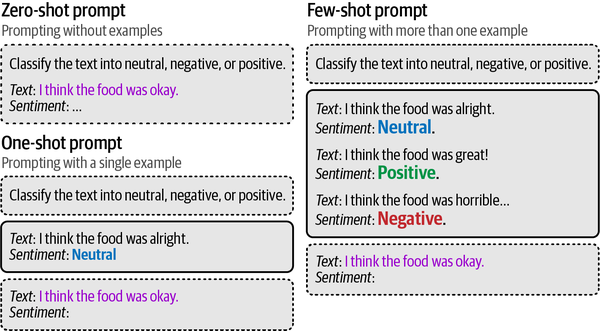

In [22]:
one_shot_prompt=[
    {
        "role":"user",
        "content":"""A 'Gigamuru' is a type of Japanese musical instrument. An example of a
sentence that uses the word Gigamuru is:"""
    },
    {
        "role": "assistant",
        "content": """I have a Gigamuru that my uncle gave me as a gift. I love to play it at
home."""
    },
    {
        "role": "user",
        "content": """To 'screeg' something is to swing a sword at it. An example of a
sentence that uses the word screeg is:"""
  }
]

In [26]:
print(pipe.tokenizer.apply_chat_template(one_shot_prompt,tokenize=False))

<|user|>
A 'Gigamuru' is a type of Japanese musical instrument. An example of a
sentence that uses the word Gigamuru is:<|end|>
<|assistant|>
I have a Gigamuru that my uncle gave me as a gift. I love to play it at
home.<|end|>
<|user|>
To 'screeg' something is to swing a sword at it. An example of a
sentence that uses the word screeg is:<|end|>
<|endoftext|>


In [29]:
response=pipe(one_shot_prompt)[0]["generated_text"]
print(response)

 During the medieval tournament, the knight skillfully screeged his opponent's shield, showcasing his prowess in the art of swordsmanship.


## Chain Prompting: Breaking up the problem
* breaking the problem within a prompt, we can do so between prompts.
* Essentially, we take the output of one prompt and use it as input for the next, thereby creating a continuous chain of interactions that solves our problem.

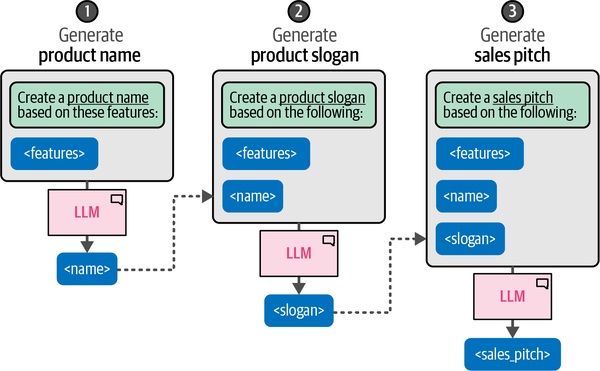

In [30]:
sales_prompt=[
    {
      "role":"user",
      "content":"Create a name and solgan for a chatbot tha leverages LLMs."
    }
]
product_description=pipe(sales_prompt)[0]["generated_text"]
print(product_description)

 Name: "ChatSage"

Slogan: "Unleashing the power of AI to connect and assist you."


In [33]:
sales_prompt=[
    {
        "role":"user",
        "content":f"Generate a very short sales pitch for the following product: {product_description}"
    }
]
out=pipe(sales_prompt)[0]["generated_text"]
print(out)

 Introducing ChatSage, your personal AI assistant that's here to unleash the power of technology and connect you with the world. With ChatSage, you'll have access to a wealth of information, personalized assistance, and seamless communication at your fingertips. Say goodbye to the hassle of searching for information and hello to a world of convenience and efficiency. ChatSage – your AI companion for a smarter, more connected life.
